# **Importacion de Librerias**

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# **Lectura de CSV**

In [24]:
df = pd.read_csv('mission_launches.csv')

In [25]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


# **Limpieza de Datos**

Eliminando columnas innecesarias

In [27]:
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)

Cambiando el tipo de dato

In [28]:
df['Price'] = df['Price'].str.replace(',','').astype(float)
df['Date'] = pd.to_datetime(df['Date'], utc=True, errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           964 non-null    float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


llenando los valores faltantes de price con el promedio

In [30]:
df['Price'] = df['Price'].fillna(df['Price'].mean())

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Detail          4324 non-null   object             
 4   Rocket_Status   4324 non-null   object             
 5   Price           4324 non-null   float64            
 6   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 236.6+ KB


agregando columnas paraa facilitar el analisis

In [32]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Country'] = df['Location'].str.split(',').str[-1].str.strip()
df

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Year,Month,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.000000,Success,2020,August,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.750000,Success,2020,August,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,153.792199,Success,2020,August,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.000000,Success,2020,July,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.000000,Success,2020,July,USA
...,...,...,...,...,...,...,...,...,...,...
4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,153.792199,Failure,1958,February,USA
4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,153.792199,Success,1958,February,USA
4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,153.792199,Failure,1957,December,USA
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,153.792199,Success,1957,November,Kazakhstan


# **Analisis de Datos**

Cuales son los 10 paises con mas lanzamientos espaciales

In [33]:
top10c = df['Country'].value_counts().reset_index(name='count').head(10)
top10c = top10c.rename(columns={'index': 'country'})
top10c

,country,count
0,Russia,1395
1,USA,1344
2,Kazakhstan,701
3,France,303
4,China,268
5,Japan,126
6,India,76
7,Pacific Ocean,36
8,New Zealand,13
9,Iran,13


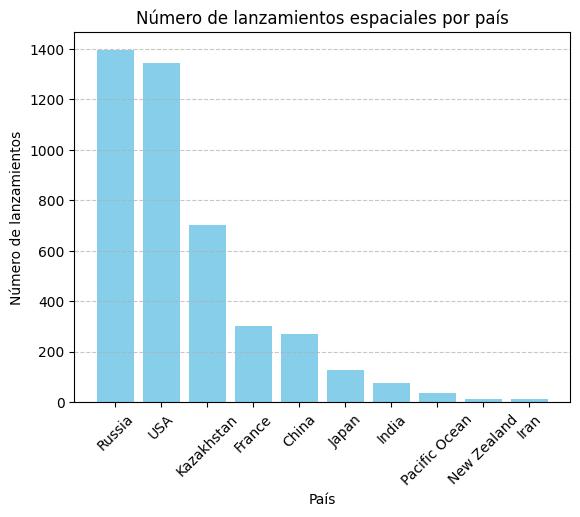

In [34]:
plt.bar(top10c['country'], top10c['count'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Número de lanzamientos')
plt.title('Número de lanzamientos espaciales por país')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Cuantos lanzamientos se han hecho por año

In [35]:
top10a = df['Year'].value_counts().reset_index(name='count')
top10a = top10a.rename(columns={'index': 'year'})
top10a

,year,count
0,1971,119
1,2018,117
2,1977,114
3,1975,113
4,1976,113
...,...,...
59,2010,37
60,2005,37
61,1958,28
62,1959,20


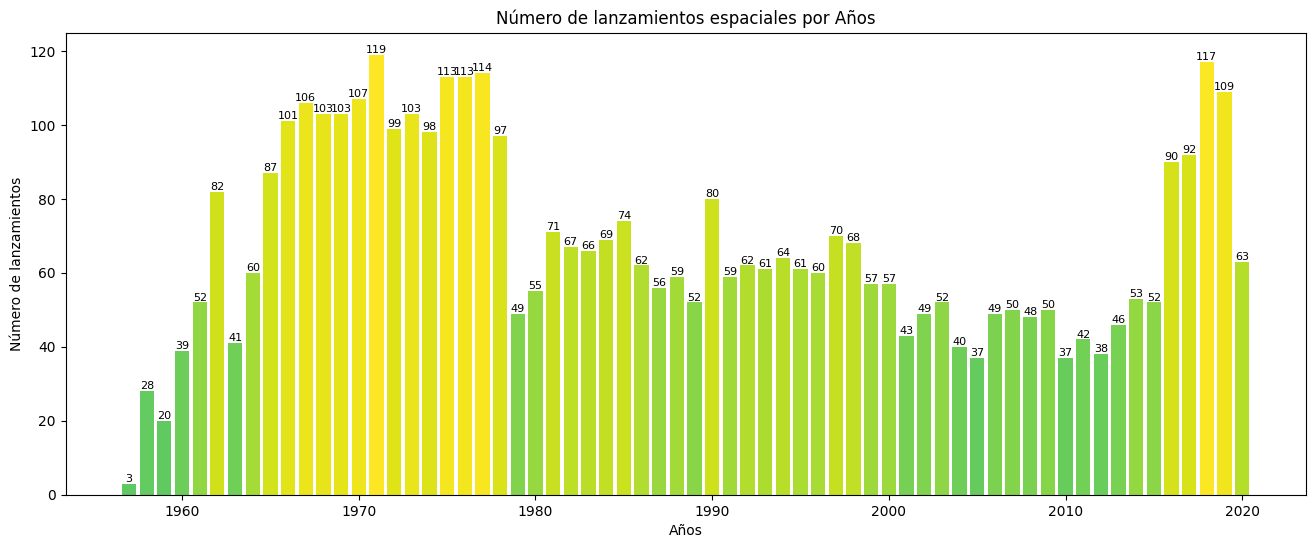

In [36]:
colores = plt.cm.viridis_r(range(len(top10a)))
plt.figure(figsize=(16, 6))
bars = plt.bar(top10a['year'], top10a['count'], color=colores)
plt.xlabel('Años')
plt.ylabel('Número de lanzamientos')
plt.title('Número de lanzamientos espaciales por Años')
plt.bar_label(bars, fmt='%.0f', label_type='edge', fontsize=8)
plt.show()

Cuales son las 10 organizaciones que lanzaron mas misiones en el año 1971

In [37]:
org = df[df['Year']==1971]
org = df['Organisation'].value_counts().reset_index(name='count').head(10)
org = org.rename(columns={'index': 'organisation'})
org

,organisation,count
0,RVSN USSR,1777
1,Arianespace,279
2,CASC,251
3,General Dynamics,251
4,NASA,203
5,VKS RF,201
6,US Air Force,161
7,ULA,140
8,Boeing,136
9,Martin Marietta,114


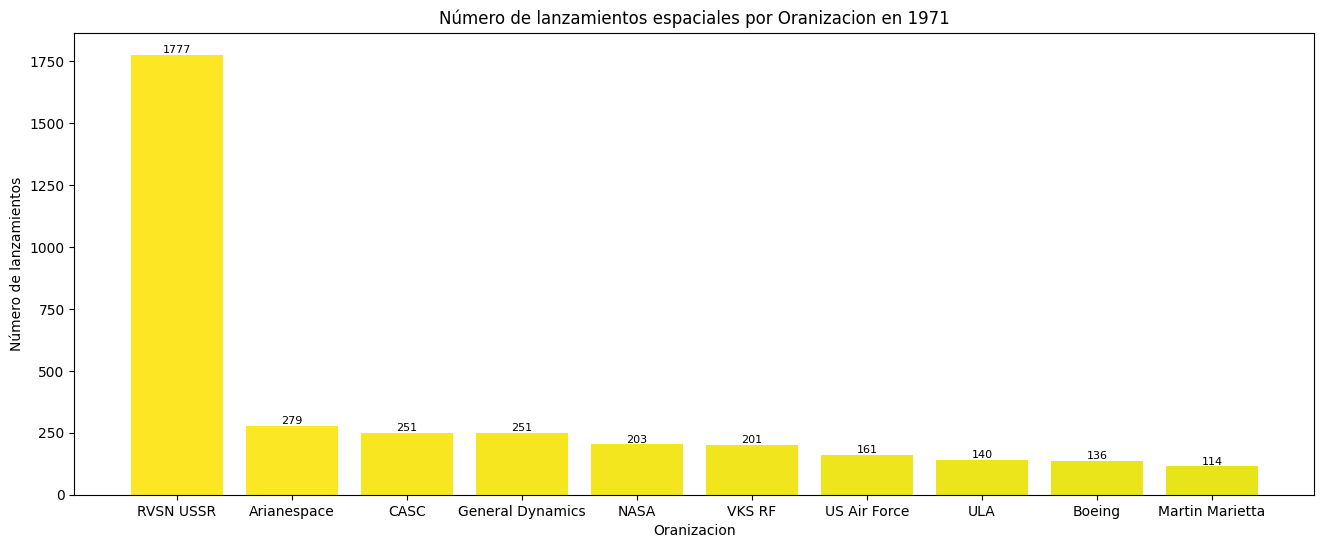

In [38]:
colores = plt.cm.viridis_r(range(len(org)))
plt.figure(figsize=(16, 6))
bars = plt.bar(org['organisation'], org['count'], color=colores)
plt.xlabel('Oranizacion')
plt.ylabel('Número de lanzamientos')
plt.title('Número de lanzamientos espaciales por Oranizacion en 1971')
plt.bar_label(bars, fmt='%.0f', label_type='edge', fontsize=8)
plt.show()

Como a variado el costo de las misiones a travez de los años

In [39]:
cos = df.groupby('Year')['Price'].mean().reset_index(name='count')
cos

,Year,count
0,1957,153.792199
1,1958,153.792199
2,1959,153.792199
3,1960,153.792199
4,1961,153.792199
...,...,...
59,2016,100.931858
60,2017,93.315295
61,2018,86.820118
62,2019,90.715864


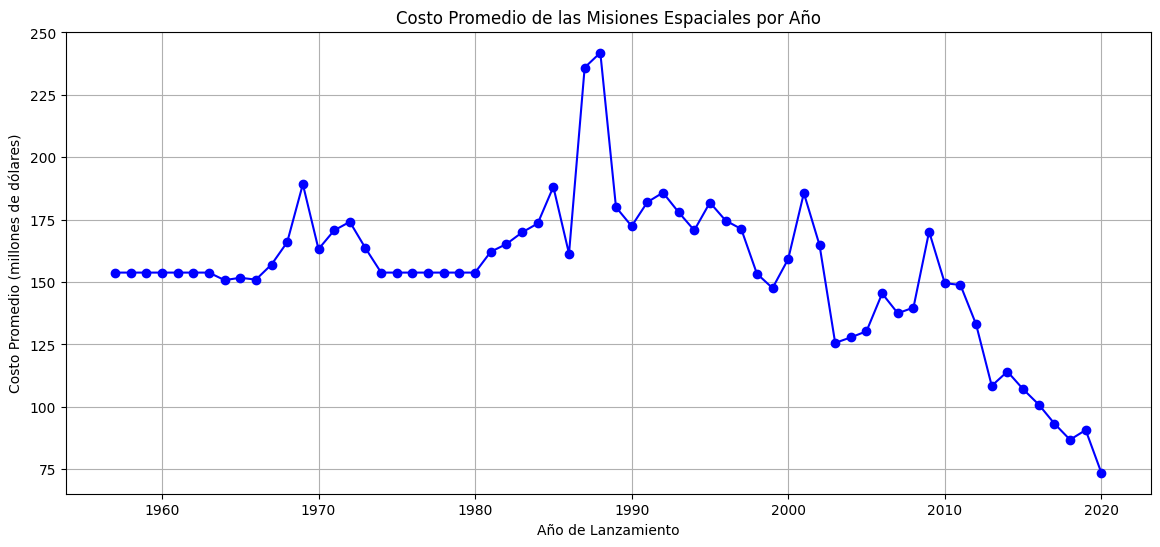

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(cos['Year'], cos['count'], marker='o', color='b')
plt.title('Costo Promedio de las Misiones Espaciales por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Costo Promedio (millones de dólares)')
plt.grid(True)
plt.show()

Que meses son los mas populares para las misiones

In [41]:
mes = df['Month'].value_counts().reset_index(name='count')
mes = mes.rename(columns={'index': 'month'})
mes

,month,count
0,December,450
1,June,402
2,April,383
3,October,381
4,August,373
5,September,365
6,March,353
7,July,351
8,February,336
9,November,336


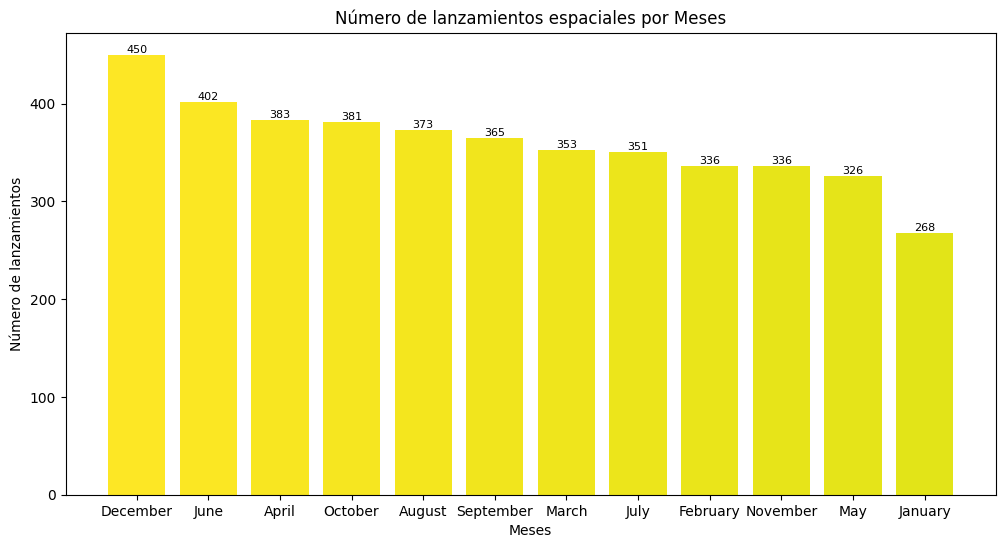

In [42]:
colores = plt.cm.viridis_r(range(len(top10a)))
plt.figure(figsize=(12, 6))
bars = plt.bar(mes['month'], mes['count'], color=colores)
plt.xlabel('Meses')
plt.ylabel('Número de lanzamientos')
plt.title('Número de lanzamientos espaciales por Meses')
plt.bar_label(bars, fmt='%.0f', label_type='edge', fontsize=8)
plt.show()

Si se han vuelto mas seguras las misiones o las posibilidades de fracaso son iguales

In [43]:
risk = pd.crosstab(df['Year'], df['Mission_Status'])
risk

Mission_Status,Failure,Partial Failure,Prelaunch Failure,Success
Year,,,,
1957,1,0,0,2
1958,20,2,0,6
1959,9,3,0,8
1960,20,0,0,19
1961,17,3,0,32
...,...,...,...,...
2016,2,1,1,86
2017,6,2,0,84
2018,2,2,0,113


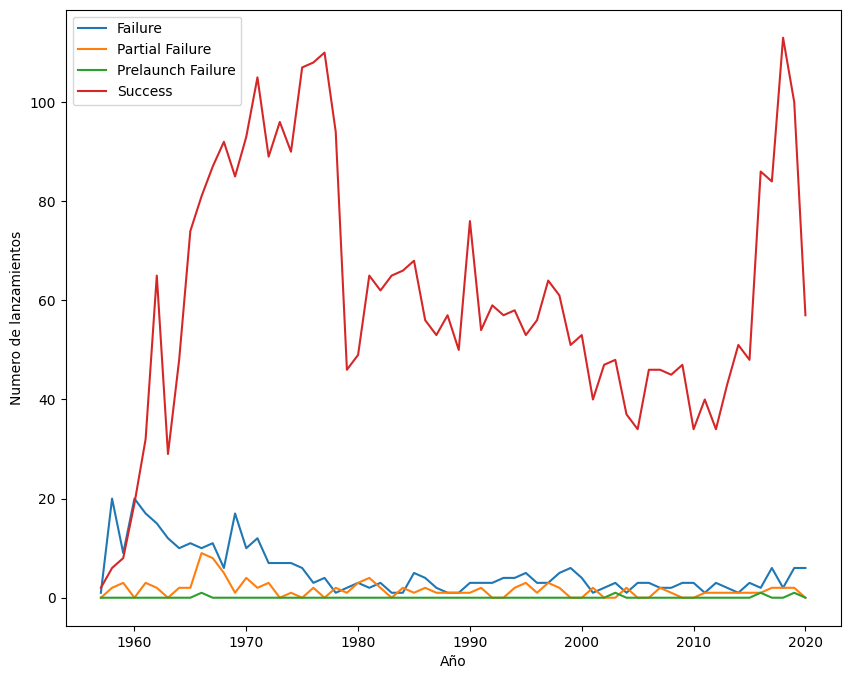

In [44]:
plt.figure(figsize=(10, 8))

for column in risk.columns:
    plt.plot(risk.index, risk[column], label=column)

plt.xlabel('Año')
plt.ylabel('Numero de lanzamientos')
plt.legend()
plt.show()